# Housing Analysis Project
* Student name: Bella Scribner
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# The Business + Project 

- A non-for-profit addiction treatment center is looking to expand their services to offer half-way houses or sober living homes to those who complete the rehabilitation in-patient treatment. 
- maybe look up some short paraphrased argumentation on the importance of halfway houses/sober living homes before returning to full independence is so important to those dealing with addiction and in recovery. 

- The center is inquiring about predictions on how expensive aquiring these houses would be in order to set fundraising and budgeting goals for the new year. Specificially they are interested in homes with certain criteria based on government requirements for halfway houses, as well as how much more or less expensive homes in calmer enviroments would be.  A calm enviroment is ideal for people in recovery.  Furthermore, residential communities tend to push back on sober living homes opening in their communities, thus the center is interested on some data concerning the price of homes in different types of zones, including residential. 

# Data Understanding

In [1]:
import pandas as pd
df = pd.read_csv('data/kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

| Column | Description |
| :--- | :--- |
| `price`| Sale price of the home (prediction target) |
| `sqft_living` | Square footage of living space in the home |
| `bathrooms` | Number of bathrooms |
| `greenbelt`| Whether the house is adjacent to a green belt (an area of open land around a city, on which building is restricted) | 
| `waterfront` | Whether the house is on a waterfront (including lake, river/slough waterfronts) |
| `nuisaance` | Whether the house has traffic noise or other recorded nuisances | 
| `view` | Quality of view from house | 
| `condition` | How good the overall condition of the house is. Related to maintenance of house |
| `grade` | Overall grade of the house. Related to the construction and design of the house | 
| `heat_source`| Heat source for the house |
| `sewer_system` | Sewer system for the house |
| `address` | The street address | 
| `lat` | Latitude coordinate of the house |
| `long` | Longitude coordinate of the house | 

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [5]:
df.corr()['price']

id              -0.034096
price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

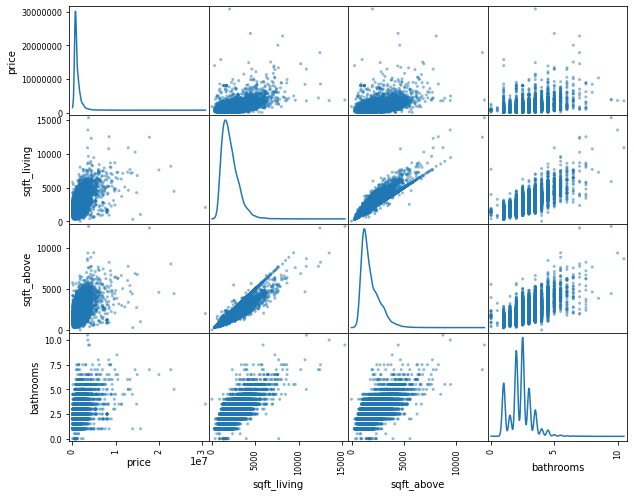

In [7]:
#fig, ax = plt.subplots(figsize=(15,10))
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_above', 'bathrooms']], diagonal='kde', figsize=(10,8));

`sqft_living`, `bathrooms`, `sqft_above`, all seem promising.  Need to inquire about `waterfront`, `greenbelt`, and `nuisance` in terms of might be good indicators (and what the addiction treatment center might be interested in) as well as `heat_source`, and `sewer_system` for compliance reasons for sober homes.  Lastly, need to look further into either `adddress` or `lat`+`long` to see if can determine zones (homes in dense residential areas tend to have push back from the community if a company tires to install halfway home or sober living home in their neighborhoods). 

In [ ]:
df['waterfront'].value_counts()

In [ ]:
df['greenbelt'].value_counts()

In [ ]:
df['nuisance'].value_counts()

In [ ]:
df['view'].value_counts()

In [ ]:
df['condition'].value_counts()

In [ ]:
df['grade'].value_counts()

In [ ]:
df['heat_source'].value_counts()

In [ ]:
df['sewer_system'].value_counts()

In [ ]:
df['address'][0]

In [ ]:
df[['lat', 'long']]

### Notes
Based on this very basic exploration of the data, the first stab at a complex linear regression might include `sqft_living`, `bathrooms`, `waterfront`, `greenbelt`, `nuisance`, `view` , `condition`, `grade`, and the manufactured `zone`. (I'm guessing that not all of the categorical values currently in this list will make it to the final regression model, but I do want to see what perhaps is relevant or not...)

The first model created will be a simple linear regression most likely with the independent variable of `sqft_living`.  

Now that I've narrowed down some ideas about which variables to include, I need to do some further EDA -- specifically concerning the distributions of these variables -- and then start model iterations.  (Also need to manufacture the zone variable, but need internet to do so...)

# Geographing the data

In [ ]:
#pip install geopandas

In [8]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# Not sure how to reference this in my notes?

In [9]:
df_lat_long = df[['price','lat', 'long']]

In [10]:
# import Kings County Map
KC_map = gpd.read_file('data/map_data/map.shp')

In [11]:
# zip lat and long 
lat_long = [Point(xy) for xy in zip(df_lat_long['long'], df_lat_long['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_lat_long, crs='EPSG:4326', geometry=lat_long)

In [12]:
geo_df.head()

,price,lat,long,geometry
0,675000.0,47.461975,-122.19052,POINT (-122.19052 47.46198)
1,920000.0,47.711525,-122.35591,POINT (-122.35591 47.71153)
2,311000.0,47.502045,-122.22520,POINT (-122.22520 47.50205)
3,775000.0,47.566110,-122.29020,POINT (-122.29020 47.56611)
4,592500.0,47.532470,-122.07188,POINT (-122.07188 47.53247)


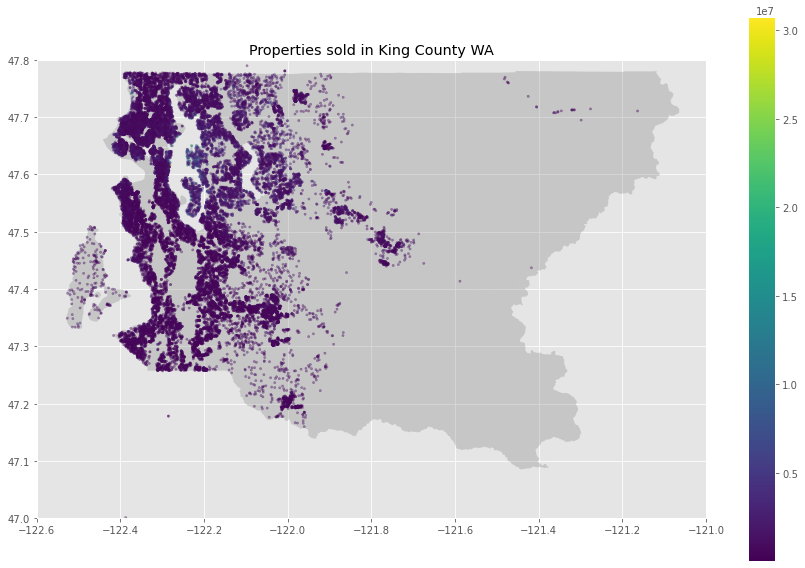

In [13]:
fig, ax = plt.subplots(figsize=(15,10))

# plot lat and long
KC_map.plot(ax=ax, color='grey', alpha=.3)
geo_df.plot(column='price', ax=ax, alpha=.4, legend=True, markersize=5)

# set lat and long boundaries for map display (?)
plt.xlim(-122.6, -121.0)
plt.ylim(47.0, 47.8)

ax.set_title('Properties sold in King County WA');

# EDA

## Let's check the address information

In [18]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [21]:
df['city'] = df['address'].map(lambda x: x.split(',')[1].strip())
df['city'].value_counts().head(10)

Seattle         9363
Renton          1943
Kent            1583
Bellevue        1528
Auburn          1511
Kirkland        1270
Federal Way     1167
Redmond          985
Sammamish        976
Maple Valley     887
Name: city, dtype: int64

In [37]:
df['state'] = test_df['address'].map(lambda x: x.split(',')[2].strip()[:10])
df['state'].value_counts()

Washington    29200
Nebraska 6      158
New Jersey       76
New York 1       66
Minnesota        63
              ...  
Texas 7620        1
Maryland 2        1
Utah 84104        1
Florida 32        1
Iowa 52590        1
Name: state, Length: 82, dtype: int64

Apparently, not all of the houses in this list are in Kings County Washington (or not even in Washington State at all!).  I'll delete any entries that are not in Washington State and from there go back to the counties list to see if I have a more managable list to then pull zoneing information for.

In [38]:
df = df[df['state'] == 'Washington']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29200 non-null  int64  
 1   date           29200 non-null  object 
 2   price          29200 non-null  float64
 3   bedrooms       29200 non-null  int64  
 4   bathrooms      29200 non-null  float64
 5   sqft_living    29200 non-null  int64  
 6   sqft_lot       29200 non-null  int64  
 7   floors         29200 non-null  float64
 8   waterfront     29200 non-null  object 
 9   greenbelt      29200 non-null  object 
 10  nuisance       29200 non-null  object 
 11  view           29200 non-null  object 
 12  condition      29200 non-null  object 
 13  grade          29200 non-null  object 
 14  heat_source    29200 non-null  object 
 15  sewer_system   29200 non-null  object 
 16  sqft_above     29200 non-null  int64  
 17  sqft_basement  29200 non-null  int64  
 18  sqft_g

In [48]:
# https://en.wikipedia.org/wiki/Category:Cities_in_King_County,_Washington
# https://kingcounty.gov/en/legacy/depts/health/codes/cities.aspx

cities_towns = pd.read_excel('data/KC_cities_towns.xlsx')
cities_towns.head()

,Name
0,Algona
1,Ames Lake
2,Auburn
3,Baring
4,Barneston


In [46]:
df['city'].isin(cities_towns['Name']).value_counts()

True     29158
False       42
Name: city, dtype: int64

In [50]:
df['city_in_county'] = df['city'].isin(cities_towns['Name'])

In [51]:
df = df[df['city_in_county'] == True]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29158 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29158 non-null  int64  
 1   date            29158 non-null  object 
 2   price           29158 non-null  float64
 3   bedrooms        29158 non-null  int64  
 4   bathrooms       29158 non-null  float64
 5   sqft_living     29158 non-null  int64  
 6   sqft_lot        29158 non-null  int64  
 7   floors          29158 non-null  float64
 8   waterfront      29158 non-null  object 
 9   greenbelt       29158 non-null  object 
 10  nuisance        29158 non-null  object 
 11  view            29158 non-null  object 
 12  condition       29158 non-null  object 
 13  grade           29158 non-null  object 
 14  heat_source     29158 non-null  object 
 15  sewer_system    29158 non-null  object 
 16  sqft_above      29158 non-null  int64  
 17  sqft_basement   29158 non-null 

## EDA

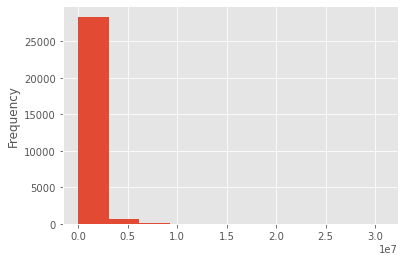

In [53]:
df['price'].plot.hist();

Not super normal -- looks like right skewed due to some outlier very expensive homes sold.  Depending on model results, might apply a log transformation, or drop outliers.

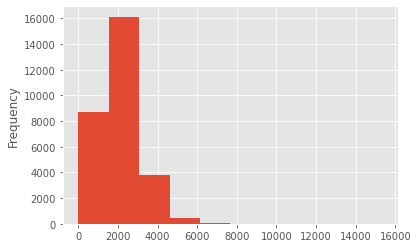

In [54]:
df['sqft_living'].plot.hist();

More normal looking than the price distribution, but not a completely normal distribution either.  Again we see a right skew which might be changed with either a log transformation or a dropping of outliers. Will need to dig further and circle back to.

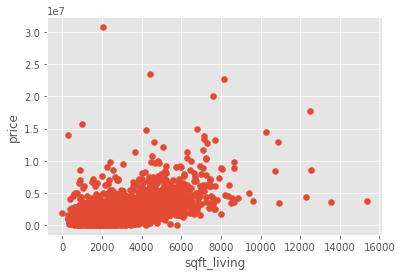

In [55]:
fig, ax = plt.subplots()
plt.scatter(df['sqft_living'], df['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('price');

Not a super linear relationship, but we will give it a go anyhow.

## Model Iteration

In [56]:
X_simple = df[['sqft_living']]
y = df['price']

In [57]:
import statsmodels.api as sm
model_simple = sm.OLS(y, sm.add_constant(X_simple))
results_simple = model_simple.fit()
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.790e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:18:30   Log-Likelihood:            -4.3401e+05
No. Observations:               29158   AIC:                         8.680e+05
Df Residuals:                   29156   BIC:                         8.680e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.267e+04   9908.860     -9.352      

The r-squared statistic is showing that this simple linear regression is explaining about 37% of the variance in sale price.  The model, intercept beta, and the coefficient for our variable `sqft_living` are all statistically significant. The model is predicting that a house with zero square feet living area would sell for negative 75.6k, and for each one squre foot increase in living area, a house would become 560 more expensive. 

### Note here about omnibus and JB -- have to reject null that the assumptions of linear regression are being met...

Not a fabulous model. Let's see if we can improve it.

# Adding more variables - preprocessing the categorical variables

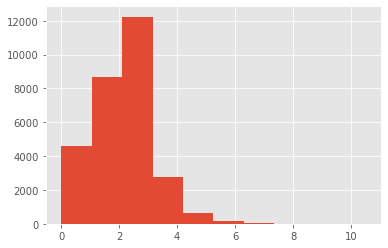

In [58]:
df['bathrooms'].hist();

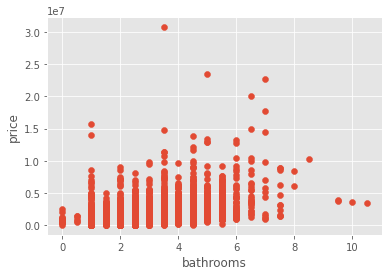

In [59]:
fig, ax = plt.subplots()
plt.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('bathrooms')
ax.set_ylabel('price');

So that doesn't look linear at all :(.  The distribution of bathrooms was fairly normal, again with a bit of right skew.  From the scatter plot we can see that therre are some outliers both in the number of bathrooms total (10 bathrooms is a lot!) as well as in sale price (note the home with about 3.5 bath that sold for over $3 million).

## Categorical Variables

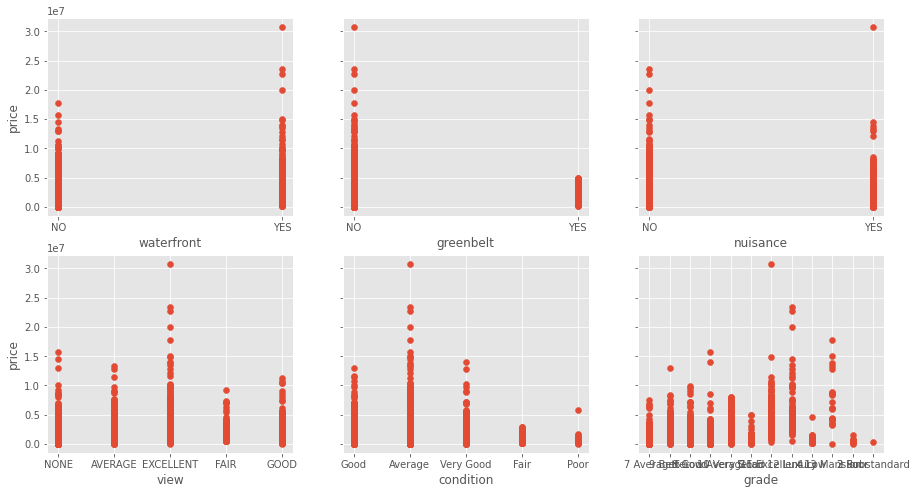

In [60]:
cat_vars = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,8), sharey=True)

for i,cat in enumerate(cat_vars):
    # set proper axis
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    #set x and y
    x = df[cat]
    y_graph = df['price']
    
    ax.scatter(x, y_graph)
    ax.set_xlabel(cat)
    if col == 0:
        ax.set_ylabel('price')

From looking at the above graphs it appears that greenbelt, view, condition and grade might be beneficial to include in the model. As for waterfront, there appears to not be much variation between houses that are or are not on a waterfront.

Also note here that don't want multicolinearity thus pick/choose (for both numerical and categorical data -- maybe more just for numberical, and need to mention earlier?)

Furthermore, based on the distributions for condition, grade and view, it would be good to create a 'low end' and 'high end' groupped tier for these variables due to low quantities in each of the ends of the sub categories.

In [68]:
df['view'].value_counts()

NONE         25640
AVERAGE       1890
GOOD           868
EXCELLENT      545
FAIR           215
Name: view, dtype: int64

In [62]:
cat_vars = df[['waterfront', 'greenbelt', 'nuisance', 'view']]

In [66]:
cat_vars_dummied = pd.get_dummies(cat_vars)
df_a = cat_vars_dummied.drop(['waterfront_NO', 'view_NONE', 'greenbelt_NO', 'nuisance_NO'], axis=1)
df_dummied = pd.concat([df, df_a], axis=1)
df_dummied

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,state,city_in_county,waterfront_YES,greenbelt_YES,nuisance_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,Renton,Washington,True,0,0,0,0,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,Seattle,Washington,True,0,0,1,1,0,0,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,Seattle,Washington,True,0,0,0,1,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,Seattle,Washington,True,0,0,0,1,0,0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,Issaquah,Washington,True,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,Seattle,Washington,True,0,0,0,0,0,0,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,Seattle,Washington,True,0,0,0,0,0,1,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,Seattle,Washington,True,0,0,1,0,0,0,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,Renton,Washington,True,0,0,0,0,0,0,0


In [69]:
subset_df = df_dummied[['price', 'sqft_living', 'bathrooms', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 
                       'view_AVERAGE', 'view_GOOD', 'view_EXCELLENT', 'view_FAIR']]
subset_df

,price,sqft_living,bathrooms,waterfront_YES,greenbelt_YES,nuisance_YES,view_AVERAGE,view_GOOD,view_EXCELLENT,view_FAIR
0,675000.0,1180,1.0,0,0,0,0,0,0,0
1,920000.0,2770,2.5,0,0,1,1,0,0,0
2,311000.0,2880,2.0,0,0,0,1,0,0,0
3,775000.0,2160,3.0,0,0,0,1,0,0,0
4,592500.0,1120,2.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,1910,2.0,0,0,0,0,0,0,0
30151,1313000.0,2020,2.0,0,0,0,0,0,0,1
30152,800000.0,1620,2.0,0,0,1,0,0,0,0
30153,775000.0,2570,2.5,0,0,0,0,0,0,0


In [70]:
X_multi = subset_df.drop('price', axis=1)
y = subset_df['price']
model_multi = sm.OLS(y, sm.add_constant(X_multi))
results_multi = model_multi.fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     2523.
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:28:09   Log-Likelihood:            -4.3259e+05
No. Observations:               29158   AIC:                         8.652e+05
Df Residuals:                   29148   BIC:                         8.653e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.014e+05   1.13e+04     -8.

This model is doing better than our baseline model.  The R-squared score has improved to .437; our model explains about 44% of the variance in price (with our outlook of inferential statistics this is not super great...).  The model as a whole as well as all of our coefficients (constant included) are statistically significant.   We are still running into the same issue that our model is not meeting the assumptions of linear regression (as seen from the statistically significant Jarque-Bera and Omnibus results).  I think the next steps include looking further into the assumptions (the residuals), and applying some transformations (such as a log transformation to the sqft_living variable) to try and improve the model prior to deciding on the final model and analyzing

- Need to look at notes + data, can I apply transformations to categorical data?
- ALSO, need to remember how to parse out the data based on third variable (look at notes, was this just for graphing or did this apply to the model somehow?  I feel like it did but can't remember how...)
- ALSO ALSO, want to graph some of this out, need to look at it -- how do I graph line of best fit again?

## Graph residuals/line of best fit??

## Drop Outliers

In [71]:
subset_df['price'].sort_values(ascending=False).head(15)

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
9516     15740000.0
10605    15000001.0
8054     14850000.0
22707    14500000.0
5811     13950000.0
12817    13850000.0
8656     13425000.0
6106     13300000.0
16673    12932174.0
6936     12901148.0
Name: price, dtype: float64

In [72]:
# create dataframe with price outliers dropped
subset_df_1 = subset_df[subset_df['price'] < 20000000]

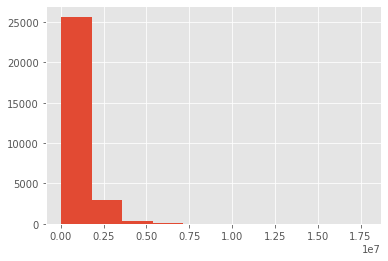

In [73]:
subset_df_1['price'].hist();

Still really skewed right...

In [86]:
subset_df_1['sqft_living'].sort_values(ascending=False).head(15)

9888     15360
25490    13540
635      12540
18100    12470
1948     12300
4411     10910
6936     10900
5219     10750
22707    10250
708       9627
4570      9440
20817     8882
22294     8680
10838     8670
22681     8640
Name: sqft_living, dtype: int64

In [87]:
subset_df_1 = subset_df[subset_df['sqft_living'] < 10000]

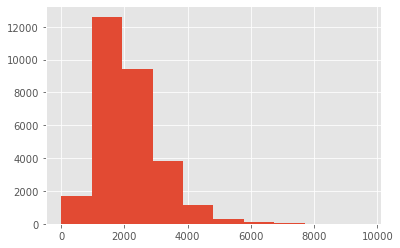

In [88]:
subset_df_1['sqft_living'].hist();

In [89]:
y_1 = subset_df_1['price']
X_1 = subset_df_1.drop('price', axis=1)
model_1 = sm.OLS(y_1, sm.add_constant(X_1))
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2473.
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:45:44   Log-Likelihood:            -4.3212e+05
No. Observations:               29149   AIC:                         8.643e+05
Df Residuals:                   29139   BIC:                         8.643e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.656e+04   1.12e+04     -8.

## Graph partial resid plot here?

## Log Transformation

In [90]:
import numpy as np
subset_df_2 = subset_df_1.copy()
subset_df_2['price_log'] = subset_df_2['price'].apply(lambda x: np.log(x))
y_log = subset_df_2['price_log']

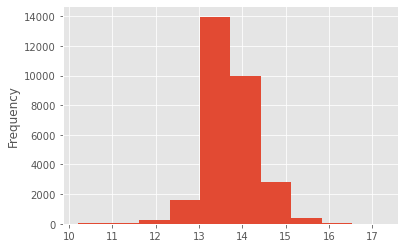

In [91]:
y_log.plot.hist();

In [93]:
subset_df_2['sqft_living_log'] = subset_df_2['sqft_living'].apply(lambda x: np.log(x))
X_2 = subset_df_2.drop(['price', 'price_log', 'sqft_living'], axis=1)

In [94]:
model_y_log = sm.OLS(y_log, sm.add_constant(X_2))
results_y_log = model_y_log.fit()
print(results_y_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     2087.
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:47:39   Log-Likelihood:                -18441.
No. Observations:               29149   AIC:                         3.690e+04
Df Residuals:                   29139   BIC:                         3.699e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.0549      0.065    1

# ARG!
So, our R-squared just seems to be getting worse. D:
At this point, should probably dig into assumptions, look at residual plots, and see if I can graph some of these best fit lines. If I can plot the lines/data out and see what is causing the most variance and why my r-squared is going down so much, then I can figure out what kind of transormations I need to make in order to make the model better... Once I dig into this for a little while, might be time to say oh well it's as good as it'll be, and then move onto interpreting and finalizing project!!

# Analysis

# Conclusions

# Next Steps